In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\bsrav\INNOMATICS c\INNOMATICS_NOTEBOOK\PROJECT\student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [12]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [14]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Data Cleaning:

The initial exploration includes a summary of the dataset, highlighting the count of non-null values, data types, and a brief statistical overview. Missing values are identified and addressed by dropping the "Unnamed: 0" column.

In [15]:
# dropping / deleting the unnamed column  
df = df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


Exploratory Data Analysis:

Gender Distribution

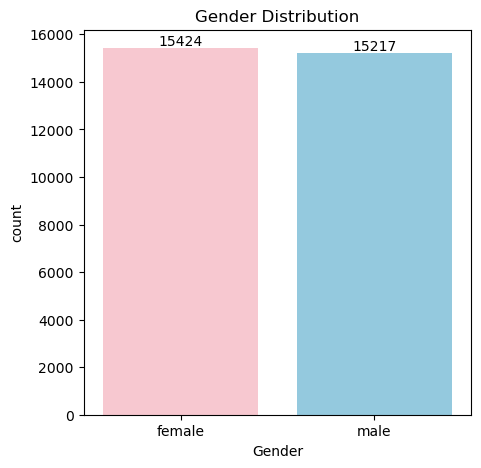

In [117]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette={'female': 'pink', 'male': 'skyblue'})
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender Distribution")
plt.show()

In [91]:
#Analysis of the above plot

# from the above chart we have analysed that:
#the number of females in the data is slightly more than the number of males

Parent's Education and Student's Score Relationship: 

The analysis continues by examining the relationship between parent education levels and student scores. A grouped bar plot with a heatmap provides a visual representation of this relationship.

In [90]:
# We're using group by function to find correlation between parents education and student's score.
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


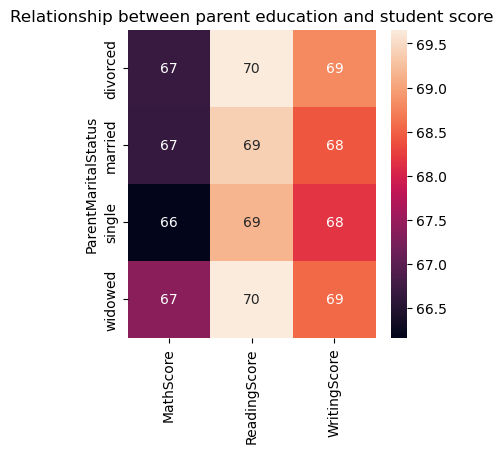

In [43]:
plt.figure(figsize = (4,4)) 
sns.heatmap(gb,annot = True)
plt.title("Relationship between parent education and student score")
plt.show()

In [36]:
#Analysis of the above plot
#from the above chat we have concluded that the education of the parents have a good impact on student scores
#Here there is the difference of 11 marks 

In [31]:
df.columns 

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

Parent Marital Status and Student's Score Relationship:

Similarly, the project investigates the impact of parent marital status on student scores, presenting the findings through a heatmap.

In [34]:
#here we are using groupby
gb1=df.groupby('ParentMaritalStatus').agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


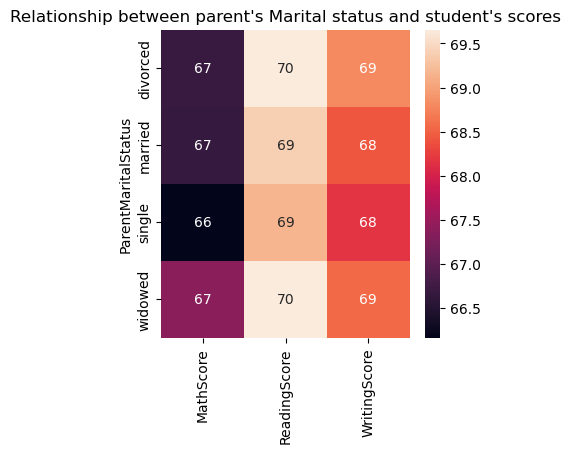

In [41]:
plt.figure(figsize = (4,4)) 
sns.heatmap(gb1,annot = True)
plt.title("Relationship between parent's Marital status and student's scores")
plt.show()

In [38]:
#from the above chat we have analysed that the MaritalStatus of the parents have no impact or negligible impact on student scores 
#Here there is only 1 mark difference compared to the above plot so there is no impact 

Boxplots for Scores: 
The distribution of scores is visualized using boxplots, providing insights into the spread and central tendency of Math, Writing, and Reading scores.

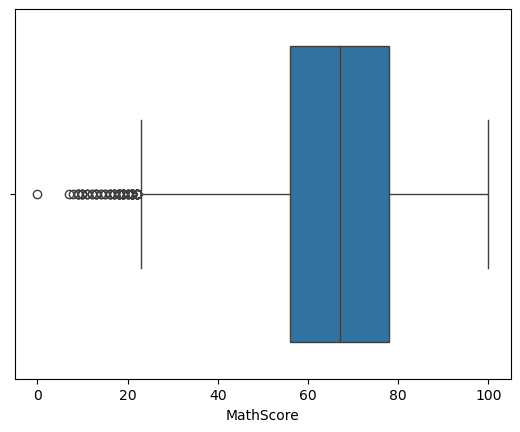

In [92]:
#Let's see an example on how to make a boxplot
sns.boxplot(data=df, x="MathScore")
plt.show()

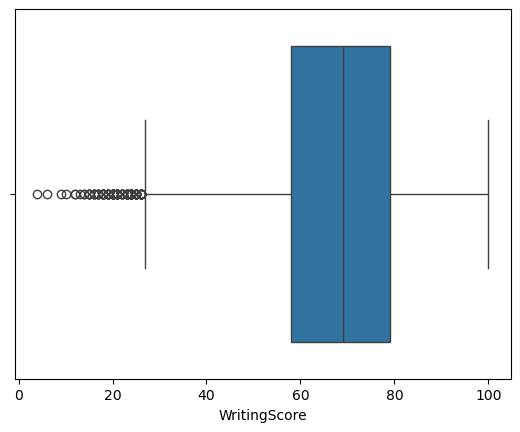

In [48]:
sns.boxplot(data=df, x="WritingScore")
plt.show()

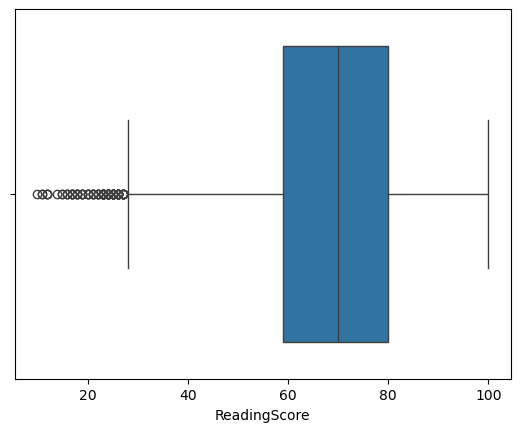

In [49]:
sns.boxplot(data=df, x="ReadingScore")
plt.show()

In [50]:
# Here the box plot is used to know whether there are outliers or not  
# from the above plots we have analysed that math is comparatively difficult subject for the student to get good marks

In [93]:
# the concentrated dark color are outliers in our data.
# interquartile range
# we have values outside particular range, that is outliers.

In [94]:
# Our outliers in zero are in math. Range is also low in Math.
# min. value is also low in math.
# you'll notice a lot of outliers in the WritingScore.

In [51]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


Distribution of Ethnic Groups:


Distribution does not mean you've taken out the count from the count plot.

But when it comes to percentage distribution, pie chart stands top. So we'll create a pie chart to take out their count.

How to create a count?

we can use .loc function of Pandas.

In [59]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [95]:
# here we have created new data frames, in which we have only those values
# that come under group A,B,C,D,E
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()
print(groupA["EthnicGroup"])
print(groupB["EthnicGroup"])
print(groupC["EthnicGroup"])
print(groupD["EthnicGroup"])
print(groupE["EthnicGroup"])

2219
5826
9212
7503
4041


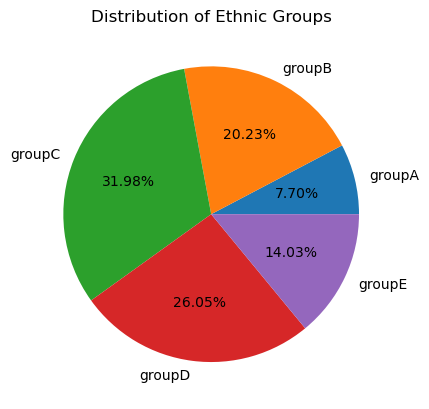

In [96]:
# now lets create list
l = ["groupA","groupB","groupC","groupD","groupE"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
# use "autopct" to see percent values.
# type "1.2f" and %% means upto 2 decimal values.
plt.pie(mlist,labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

In [97]:
# Ethnic group C has the highest distribution.

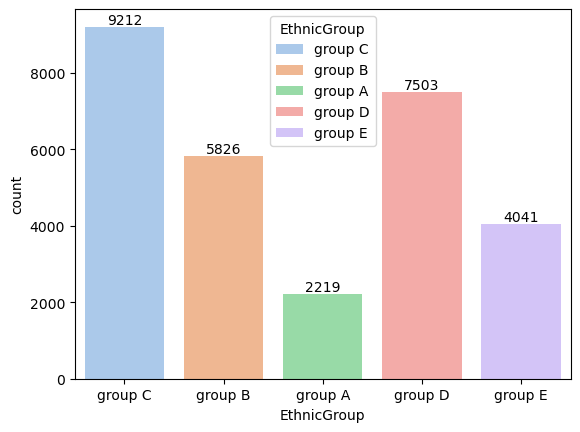

In [114]:
ax = sns.countplot(data=df, x="EthnicGroup",hue="EthnicGroup", palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.show()